### MAP556, Ecole Polytechnique, 2020-2021

# TP 2- Réduction de variance 

On se donne un modèle défini par la relation $Y=f(X)$.
L'objectif est d'estimer la valeur $\mathbb{E}\bigl[g(Y)\bigl]$, pour une certaine fonction $g$ sur l'ensemble des sorties $Y$. On suppose que $g(Y)$ est de carré intégrable.

### Exercice 1. Variables de contrôle

Les modèles "boîte noire" représentant des systèmes entrée-sortie de codes numériques sont souvent couteux en temps de calcul. 
Supposons avoir un modèle entrée-sortie réduit  $Y_r = f_r(X)$ plus facile à simuler, pour différentes valeurs des entrées $X$, que le modèle $Y = f(X)$, et tel que la quantité $m_r = \mathbb{E}\bigl[g(Y_r)\bigl]$ est connue.
On supposera de plus $\mathbb{E}\bigl[g(Y_r)^2\bigl]<\infty$.

On note $(X_i)_{1\leq i\leq n}$ une suite de copies indépendantes de la variable d'entrée $X$, et l'on pose
 \begin{eqnarray*}
 I_n&=&\frac{1}{n}\sum_{i=1}^n g(f(X_i)),\qquad
 I_n^c = m_r+\frac{1}{n}\sum_{i=1}^n \bigl( g(f(X_i)) - g(f_r(X_i)) \bigr) .
 \end{eqnarray*}


####  Question 1:
Vérifier que $I_n$ et $I_n^c$ sont des estimateurs non biaisés de $\mathbb{E}\bigl[g(Y)\bigl]$, et calculer leur variances.

* Esperance

$I_n \to \mathbb{E}[g(f(X))]$ par la loi des grands nombres. Donc $I_n \to \mathbb{E}[g(Y)]$ (Slutsky)

Il suffit de montrer que $\frac{1}{n}\sum^{n}_{i=1}g(f_r(X_i)) \to m_r $, ce qui est vrai par la loi des grands nombres.

* Variance
$Var(I_n) = \frac{1}{n^2} Var(\sum^{n}_{i=1} g(f(X_i))) = \frac{1}{n^2}\sum_1^n Var(G(f(X_i))) = \frac{1}{n}Var(g(f(X)))$

$Var(I_n^c) = \frac{1}{n}Var(g(f(X)) - g(f_r(X)))$

####  Question 2:

On suppose que les variables d'entrée $X$ suivent une loi uniforme sur $[0,1]$, $f(x)=e^x$,  $f_r(x)=1+x$, et $g(y)=y$. 

Simuler les deux estimateurs et leurs intervalles de confiance asymptotiques à $95\%$.

Tracer les courbes des moyennes empiriques $I_n,I_n^c$.

Quel est le gain en termes de nombre de simulations de l'estimateur $I_n^c$, pour la même précision asymptotique que la méthode de Monte-Carlo naive?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [4]:
N = 1000 # Taille echantillon

integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

############################################
# Calculer la valeur exacte de m_r
m_r = 1.5
############################################

############################################
# Simuler les echantillons de valeurs de Y
# et de Y_controle
X = np.random.rand(N)
Y = np.exp(X)

Ycontrole = m_r + Y - (1 + X)
############################################

############################################
## Calculer les deux estimateurs, leurs
## variances empiriques, et les demi-largeurs
## des intervalles de confiance

Mean_MC = np.mean(Y)
Variance_MC = np.var(Y)

Mean_controle = np.mean(Ycontrole)
Variance_controle = np.var(Ycontrole)

demiLargeurIC95_MC = 1.96 * np.sqrt(Variance_MC/N)
demiLargeurIC95_Contr = 1.96 * np.sqrt(Variance_controle/N)

############################################
# Gain en termes de nombre de simulations
# pour la meme precision

gain_controle = Variance_MC / Variance_controle
############################################

############################################
# Pour l'affichage: valeur exacte de E[g(Y)]
Esp_gY = np.exp(1.) - 1.

print("Taille echantillon = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)

print("Estimateur MC : moyenne= %1.3f  variance emp = %1.3f" \
      %(Mean_MC, Variance_MC))
print("IC(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_MC-demiLargeurIC95_MC, Mean_MC+demiLargeurIC95_MC))

print("Estimateur Controle : moyenne= %1.3f  variance emp = %1.3f" \
      %(Mean_controle, Variance_controle))
print("IC(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_controle-demiLargeurIC95_Contr, Mean_controle+demiLargeurIC95_Contr))

print("Gain en nombre de simulations avec variable de controle : %1.2f" %gain_controle)

Taille echantillon = 1000
Esp_gY = 1.718 

Estimateur MC : moyenne= 1.703  variance emp = 0.240
IC(95%) = [1.672,1.733] 

Estimateur Controle : moyenne= 1.712  variance emp = 0.043
IC(95%) = [1.699,1.725] 

Gain en nombre de simulations avec variable de controle : 5.58


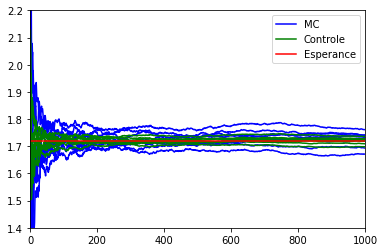

In [5]:
############################################
## Affichage de 10 trajectoires 
############################################

############################################
# Simuler M=10 trajectoires des estimateurs
# I_n et I_n^c
# Taille souhaitee pour les arrays: M x N
M = 10

X = np.random.rand(M, N)
Y = np.exp(X)
Ycontrole = m_r + Y - (1 + X)
I_n = np.cumsum(Y, axis=1) / integers1toN
Ic_n = np.cumsum(Ycontrole, axis=1) / integers1toN

############################################
## On affiche les 10 trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Controle")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Esperance")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

####  Question 3: 
On note $(I^j_n)_{1\leq i\leq M}$ et $(I^{c,j}_n)_{1\leq i\leq M}$ les estimations empiriques associées à $M$ tirages indépendants des deux estimateurs.

Evaluer explicitement $m = \mathbb{E}\bigl[g(Y)\bigl]$ et tracer les histogrammes des erreurs $(I^j_n - m)_{1 \le j \le M}$ et $(I^{c,j}_n - m)_{1 \le j \le M}$.

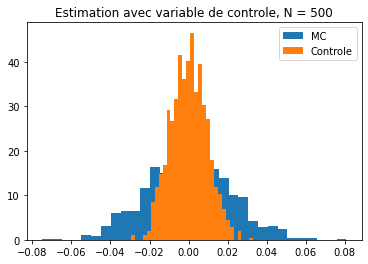

In [9]:
N = 500 # Taille echantillon
M = 1000 # Nombre de tirages des estimateurs

integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

Esp_gY = np.exp(1.)-1.
m_r = 1.5

############################################
# Simuler les echantillons de valeurs de Y
# et de Y_controle
X = np.random.rand(M, N)
Y = np.exp(X)
Ycontrole = m_r + Y - (1 + X)
############################################

############################################
# Echantillons de taille M des deux estimateurs 

I_N = np.mean(Y, axis=1) - Esp_gY
Ic_N = np.mean(Ycontrole, axis=1) - Esp_gY

############################################
## Afficher les histogrammes des erreurs
## pour les deux estimateurs

plt.hist( I_N, density="True", bins=int(np.sqrt(M)), label="MC")
plt.hist( Ic_N , density="True", bins=int(np.sqrt(M)), label="Controle")
plt.title("Estimation avec variable de controle, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

####  Question 4:  Variable de contrôle optimale

On considère maintenant l'estimateur
\begin{eqnarray*}
I_n^\lambda =  \lambda \, m_r + \frac{1}{n}\sum_{i=1}^n \bigl(g(f(X_i)) - \lambda \, g(f_r(X_i))\bigr),
\qquad \lambda \in \mathbb R.
\end{eqnarray*}

Proposer un choix du paramètre $\lambda$.

Tracer les trajectoires des moyennes empiriques $I_n^\lambda$ ainsi obtenues, puis l'histogramme des erreurs de cet estimateur.

$\lambda_{op} = \frac{Cov(g(f(X)), g(f_r(X)))}{Var(g(f_r(X)))}$

In [52]:
############################################
## Estimation de lambda optimal a partir d'un
## petit nombre de simulation
############################################
n = 100
X = np.random.rand(n)
Y = np.exp(X)

## lambda optimal empirique
lambda_opt = (np.mean(Y*(1 + X)) - np.mean(Y)*np.mean(1+X))/np.var(1+X)

print("lambda optimal = %1.3f" %lambda_opt)
print("lambda optimal theorique= %1.3f" %(6*(3-np.e)))

lambda optimal = 1.706
lambda optimal theorique= 1.690


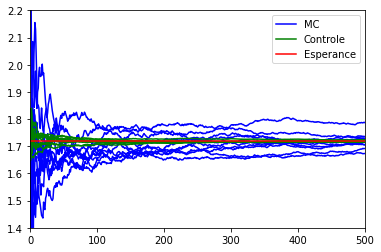

In [55]:
#############################################
### Pour les histogrammes: M x N tirages 
#############################################
M = 1000
N = 500
integers1toN = np.arange(1,N+1)

X = np.random.rand(M, N)
Y = np.exp(X)
Y_controle = lambda_opt * m_r + Y - lambda_opt * (1 + X)

#############################################
### Affichage des 10 premieres trajectoires 
#############################################
I_n = np.cumsum(Y[0:10,:], axis=1) / integers1toN

Ic_n = np.cumsum( Y_controle[0:10,:], axis=1) / integers1toN

## On affiche les 10 trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Controle")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Esperance")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

In [56]:
#################################################
# Calcul des deux estimateurs I_N et I_N controle
# et de leurs variances empiriques
Mean_MC = np.mean(Y[0, :])
Variance_MC = np.var(Y[0, :])

Mean_controle = np.mean(Y_controle[0, :])
Variance_controle = np.var(Y_controle[0, :])

demiLargeurIC95_MC = np.sqrt(Variance_MC / N)*1.96
demiLargeurIC95_Contr = np.sqrt(Variance_controle / N)*1.96

gain_controle = Variance_MC/Variance_controle

print("Taille echantillon = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("Estimateur MC : moyenne= %1.3f  variance emp = %1.3f" \
      %(Mean_MC, Variance_MC))
print("IC(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_MC-demiLargeurIC95_MC, Mean_MC+demiLargeurIC95_MC))

print("Estimateur Controle : moyenne= %1.3f  variance emp = %1.3f" \
      %(Mean_controle, Variance_controle))
print("IC(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_controle-demiLargeurIC95_Contr, Mean_controle+demiLargeurIC95_Contr))

print("Gain en nombre de simulations avec variable de controle : %1.2f" %gain_controle)

Taille echantillon = 500
Esp_gY = 1.718 

Estimateur MC : moyenne= 1.673  variance emp = 0.230
IC(95%) = [1.631,1.715] 

Estimateur Controle : moyenne= 1.718  variance emp = 0.004
IC(95%) = [1.713,1.723] 

Gain en nombre de simulations avec variable de controle : 61.14


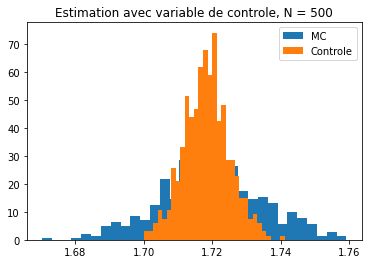

In [58]:
#############################################
## Pour les histogrammes: evaluer les
## erreurs des deux estimateurs I_N et I_N controle
#############################################
erreur_N = np.mean(Y, axis=0)
erreur_controle_N = np.mean(Ycontrole, axis=0)

plt.hist( erreur_N , density="True", bins=int(np.sqrt(M)), label="MC")

plt.hist( erreur_controle_N, density="True", bins=int(np.sqrt(M)), label="Controle")

plt.title("Estimation avec variable de controle, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

### Exercice 2. Echantillonnage antithétique et Méthodes de stratification

On suppose que les variables d'entrée $X$ sont de loi uniforme entre $-1$ et $+1$.
On se place dans la situation $f(x)=e^x$, et $g(y)=y$, où l'on veut estimer $\mathbb{E}\bigl[g(Y)\bigl]= \mathbb{E}\bigl[e^X\bigl]$.


####  Question 1: Méthode de Monte-Carlo de base

On note $I_n$ la moyenne empirique de  $n$ copies indépendantes de $X$.

Vérifier que l'on a $\mathbb{E}\bigl[e^X\bigl] = \sinh(1)\simeq 1.18$, et $\mbox{Var}(e^X)= \frac{1}{2} (1-e^{-2})\simeq 0.43$. 

Tracer les courbes des moyennes empiriques obtenues sur plusieurs réalisations, et comparer avec la quantité recherchée.

In [59]:
# Constantes à charger pour le reste de l'exercice

N = 1000 # Taille echantillon
integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

Esp_gY = np.sinh(1.0)
Var_gY = (1.0 - np.exp(-2.))/2.

In [60]:
############################################
# Completer avec N tirages de la loi uniforme [-1,1]
# et les tirages de Y = exp(X)
X = 2 * np.random.rand(N) - 1
Y = np.exp(X)
############################################

############################################
# Stocker dans 'mean' l'estimation MC de E[g(Y)]
# dans 'var' la variance empirique et dans 'demiLargeurIC'
# la demi-largeur de l'intervalle de confiance 
# asymptotique a 95% pour E[g(Y)]
mean = np.mean(Y)
var = np.var(Y)
demiLargeurIC = 1.96 * np.sqrt(var / N)
############################################

print("Estimateur MC \n")

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
print("mean = %1.3f  var = %1.3f" %(mean,var))
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.3f" %(demiLargeurIC/mean))


Estimateur MC 

Esp_gY = 1.175 Var_gY = 0.432
mean = 1.156  var = 0.421
Intervalle de confiance 95% pour E[g(Y)] = [ 1.116 , 1.196 ] 

erreur relative = 0.035


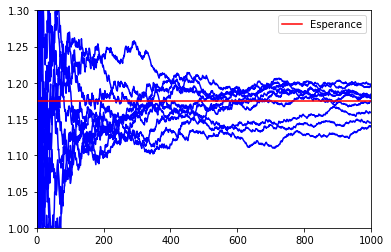

In [61]:
M = 10 # nombre de réalisations de moyennes empiriques

############################################
# Evaluer M trajectoires de l'estimateur empirique I_n
X = 2 * np.random.rand(M, N) - 1
Y = np.exp(X)
I_n = np.cumsum(Y, axis=1)/integers1toN
############################################

# Affichage des trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 2: Echantillonnage antithétique

Vérifier que $(f(u)-f(v))(f(-u)-f(-v))\leq 0$, pour tout $(u,v)\in [-1,1]$, et en déduire une technique
d'échantillonnage antithétique fondée sur la simulation de $n$ variables uniformes sur $[-1,1]$. 

On note $I^{\prime}_n$ l'estimateur empirique correspondant.

Tracer les courbes des moyennes empiriques obtenues. 

Quel est le gain en termes de nombre de simulations de cet estimateur,
pour la même précision asymptotique que la méthode de Monte-Carlo naive?

In [62]:
############################################
# Completer avec N de tirages de la loi uniforme [-1,1]
# et les tirages antithetiques
X = 2 * np.random.rand(N) - 1
Z = 0.5*(np.exp(X)+np.exp(-X))
############################################

############################################
# Completer avec le calcul de l'estimateur antithetique
mean = np.mean(Z)
var = np.var(Z)
demiLargeurIC = 1.96 * np.sqrt(var/N)
############################################

print("Estimateur antithetique \n")

print("Esp_gY = %1.3f" %(Esp_gY))
print("I_prime_mean = %1.3f  var empirique = %1.3f" %(mean, var))
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.3f" %(demiLargeurIC/mean))
print("gain en nombre de simulations par rapport a MC : %1.2f" %(Var_gY/var))


Estimateur antithetique 

Esp_gY = 1.175
I_prime_mean = 1.168  var empirique = 0.025
Intervalle de confiance 95% pour E[g(Y)] = [ 1.159 , 1.178 ] 

erreur relative = 0.008
gain en nombre de simulations par rapport a MC : 17.52


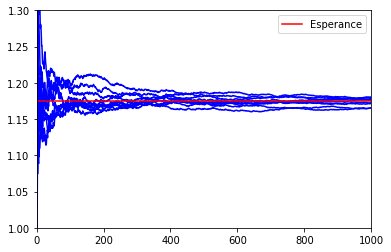

In [63]:
############################################
## Trajectoires de la moyenne empirique
############################################

############################################
# Evaluer M trajectoires de l'estimateur empirique I'_n
X = 2 * np.random.rand(M, N) - 1
Z = 0.5*(np.exp(X)+np.exp(-X))

############################################
# Completer avec le calcul des trajectoires
# de l'estimateur antithetique
I_prime_n = np.cumsum(Z, axis=1) / integers1toN
############################################

# Affichage des trajectoires de l'estimateur
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_prime_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 3: **Stratification proportionnelle** 
Proposer une technique de stratification proportionnelle fondée sur la simulation de variables 
uniformes sur $[-1,0]$, et uniformes sur $[0,1]$.

On note $J_n$ l'estimateur correspondant.
Tracer les trajectoires de l'estimateur en fonction de $n$.
Cet estimateur satisfait-il un TCL?
Quel est le gain en termes de nombre de simulations de cet estimateur, pour la même précision asymptotique que la méthode Monte-Carlo naive?

Peut-on calculer explicitement $\mbox{Var}(J_n)$? (voir question 5)

In [ ]:
# Stratification proportionnelle (on prendra N pair)
N1 = int(N/2); N2 = N1

############################################
# Completer avec N1 et N2 tirages des lois
# conditionnelles sur les strates
X1 = ?????
X2 = ?????
############################################

############################################
# Completer avec le calcul de l'estimateur stratifie
J_N = ?????

############################################
# Evaluer par simulation la variance asymptotique
# dans le TCL pour l'estimateur J_N
############################################
var = ?????

demiLargeurIC = 1.96*np.sqrt(var / N)
erreurRelative = demiLargeurIC / J_N

#######
print("Estimateur par stratification proportionnelle \n")

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
print("J_N = %1.3f  variance estimee  = %1.3f" %(J_N, var))
print("IC = [%1.3f,%1.3f] \n" %(J_N - demiLargeurIC, J_N + demiLargeurIC))
print("erreurRelative = %1.3f" %erreurRelative)

print("gain en nombre de simulations par rapport a MC : %1.2f" %(Var_gY/var))


In [ ]:
############################################
## Trajectoires de l'estimateur stratifie J_n
## pour n = 2,4,...,N
############################################
M = int(10)

############################################
# Completer avec M x N1 et M x N2 tirages
# des lois conditionnelles sur les strates
X1 = ?????
X2 = ?????
############################################

J_n = np.zeros((M,int(N/2)))

############################################
# Completer avec le calcul de l'estimateur
# stratifie pour n = 2,4,...,N

for n in np.arange(2, N+2, 2):
    n1 = n/2
    J_n[:, n1-1] = ?????

############################################
# Affichage des trajectoires de l'estimateur
## stratifie pour n = 2,4,...,N

evenIntegers1toN = np.arange(2,N+2,2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(evenIntegers1toN, J_n[1:10,:].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()


####  Question 4: Stratification non proportionnelle
Proposer une technique de stratification  fondée sur la simulation d'une proportion $n_1=rn$ de variables 
uniformes sur $[-1,0]$, et $n_2=(1-r)n$ de variables uniformes sur $[0,1]$, avec $r \in (0,1)$ tel que $n_1,n_2$ soient entiers. 

Tracer les trajectoires de ces estimateurs en fonction de $n$, pour différentes valeurs de $r$.

In [ ]:
# Stratification non proportionnelle
def stratificationNonProportionnelle(r):
    N1 = int(N*r)
    N2 = int(N - N1)
    
    ################
    # Completer avec N1 et N2 tirages
    # des lois conditionnelles sur les strates
    X1 = ?????
    X2 = ?????
    ################
    
    ################
    # Estimateur stratifie
    J_N = ?????
    
    ############################################################
    # On evalue par simulation la variance de l'estimateur J_N
    var = ?????
        
    demiLargeurIC = 1.96*np.sqrt(var)
    
    erreurRelative = demiLargeurIC / J_N
    
    print("Estimateur par stratification non proportionnelle, r = %1.2f \n" %r)
    
    print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
    print("J_N = %1.3f  var*N = %1.3f" %(J_N, var))
    print("IC = [%1.3f,%1.3f] \n" %(J_N - demiLargeurIC, J_N + demiLargeurIC))
    
    print("erreurRelative = %1.3f" %erreurRelative)
    print("gain en nombre de simulations par rapport a MC : %1.2f" %(Var_gY/var))
    
    ############################################
    ## Trajectoires de l'estimateur stratifie pour n=1,..,N
    ############################################
    M = 10
    
    #####################
    # Completer avec M x N1 et M x N2 tirages
    # des lois conditionnelles sur les strates
    #X1 = ?????
    #X2 = ?????
    
    Y1 = np.exp(X1); Y2 = np.exp(X2)
    
    J_n = np.zeros((M,N))
    
    #####################
    # Completer avec le calcul de l'estimateur
    # stratifie pour les differentes valeurs de n
    for n in np.arange(int(1/r),N):
        n1 = int(n*r)
        n2 = n-n1
        J_n[:,n] = ?????
        
    ############################################
    # Affichage des trajectoire
    integers1toN = np.arange(1,N+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(integers1toN, J_n[1:10,:].T, color="b")
    
    ax.set_ylim(1.0, 1.3)
    ax.axhline(Esp_gY, color="r", label="Esperance")
    ax.legend(loc="best")
    plt.show()

#stratificationNonProportionnelle(0.8)
#stratificationNonProportionnelle(0.4)
#stratificationNonProportionnelle(0.2)

####  Question 5: Stratification optimale  sur les deux strates $(S_1,S_2)=([-1,0],[0,1])$

Calculer les valeurs des paramètres
\begin{eqnarray*}
\sigma_1^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[-1,0]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[-1,0]\bigl]^2\\
\sigma_2^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[0,1]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[0,1]\bigl]^2
\end{eqnarray*}
et proposer une technique de stratification optimale. 
Simuler l'estimateur empirique associé, tracer ses trajectoires.


In [ ]:
## Calcul explicite de sigma_1, sigma_2
sigma_1 = np.sqrt(0.5*(1.-np.exp(-2)) - (1.-np.exp(-1))**2)
sigma_2 = np.sqrt(0.5*(np.exp(2)-1.) - (np.exp(1)-1.)**2)

############################################
## Calculer le N1 optimal
#r = ??????

N1 = int(N *r)
N2 = int(N - N1)

############################################
## Simulation de l'estimateur par stratification
## non proportionnelle avec N1 optimal
## 
## C'est le meme code que la Question 4: on pourrait directement appeler 
## la fonction stratificationNonProportionnelle(r)
## La seule différence dans le code ci-dessous est que l'on utilise
## variance explicite de l'estimateur stratifié, au lieu de l'estimer.
#X1 = ??????
#X2 = ??????

############################################
# Estimateur stratifie
#J_N = ??????

############################################
## Calculer la variance de l'estimateur J_N optimal.
## On peut utiliser l'expression explicite de la variance de J_N
#var = ??????

demiLargeurIC = 1.96 * np.sqrt(var / N)
erreurRelative = demiLargeurIC / J_N

############################################
print("Estimateur par stratification non proportionnelle optimale, r_optimal = %1.3f" %r)

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY,Var_gY))
print("J_mean = %1.3f  variance_theorique = %1.3f" %(J_N, var))
print("IC = [%1.3f,%1.3f] \n" %(J_N - demiLargeurIC, J_N + demiLargeurIC))

print("erreurRelative = %1.3f" %erreurRelative)
print("gain theorique en nombre de simulations par rapport a MC : %1.2f" %(Var_gY/var))

In [ ]:
############################################
# Completer avec le calcul des trajectoires de 
# l'estimateur pour les differentes valeurs de n
J_n = np.zeros((M,N))

for n in np.arange(int(1/r),N):
    n1 = int(n*r)
    n2 = n-n1
    J_n[:,n] = ?????
    
############################################
# Affichage des trajectoires 
integers1toN = np.arange(1,N+1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n[1:10,:].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()